# Random Asset Exchange Model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

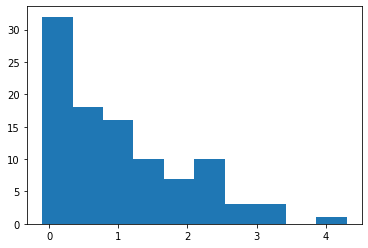

In [61]:
#Basic Model; remember everything
npeople = 100
nsteps = 10000
coin = 0.1

wealth = np.ones(npeople)

for t in range(nsteps):
    p1 = np.random.randint(low=0, high=n_people)
    p2 = np.random.randint(low=0, high=n_people)
    if wealth[p1]>0:
        wealth[p1] -= coin
        wealth[p2] += coin

plt.hist(wealth); 



In [5]:
#Define function to calculate Gini coefficient 

def gini(x):
    y = np.sort(x) #In order to sort by wealth
    upper_sum = 0
    n = len(x)
    for i in range(n):
        upper_sum += (i+1)*y[i]
    return 1-2/(n-1)*( n - upper_sum/sum(y) )
        

#This is a test  
print('This should be 0:',gini([1,1,1,1]))
print('This should be 1:',gini([1,0,0,0]))
print('This should be something else:',gini([10,5,1,1]))
    

This should be 0: 0.0
This should be 1: 1.0
This should be something else: 0.6078431372549019


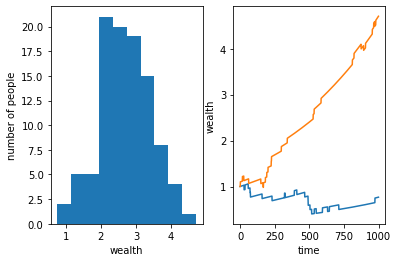

In [76]:
#Model with history and compound interest 
npeople = 100
nsteps = 1000
trades_per_step = 10
coin = 0.1
interest = 0.001


wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)

for t in range(1,nsteps): 
    wealth[t,:] = wealth [t-1,:] *(1+interest)
    for i in range(trades_per_step):
        p1 = np.random.randint(low=0, high=n_people)
        p2 = np.random.randint(low=0, high=n_people)
    if wealth[t,p1]>0:
        wealth[t,p1]=wealth[t-1,p1]-coin
        wealth[t,p2]=wealth[t-1,p2]+coin

plt.subplot(1,2,1)
plt.hist(wealth [-1,:], bins=10);
plt.xlabel('wealth');
plt.ylabel('number of people');

plt.subplot(1,2,2)
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
plt.xlabel('time');
plt.ylabel('wealth');



Below, we'll need to remember the values of tax rate we try. As we'll need them for the x-axis. How do we do that?

3 options:
* Pre-create an array of all possible values, and iterate through them 
* Pre-allocate some space and fill it with zeros or something -- store values there as you go 
* Create an empty array by doing np.array([]), then append values to it using np.append(a,new_value)

# How to organize loops

In [46]:
a= np.array([]) #Empty

IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 11

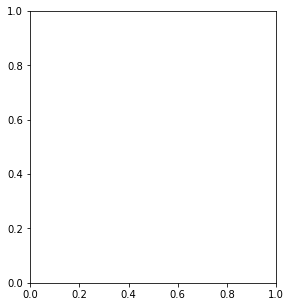

In [50]:
#Adding in taxation --> Universal Basic Income

nsteps = 3000
trades_per_step = 10
npeople = 100
coin = 0.1
interest = 0.000
tax_rate = 0.001

wealth = np.ones(shape=(nsteps,npeople))
gini_history = np.zeros(nsteps)
tax_rates = np.arange(start=0,stop=0.16,step=0.01)
final_gini = np.zeros(shape=tax_rates.shape)


for itax in range(len(tax_rates)):
    tax_rate=tax_rates[itax]
    
    for t in range(1,nsteps):                             #We now start at t=1, to be able to refer to t-1 (prev step)
        wealth[t,:] = wealth[t-1,:]*(1+interest)          #By default, wealth at t remains the same as it was at t-1

        collect = tax_rate*np.sum(wealth[t,:])            #Collecting taxes
        wealth[t,:] = (1-rate)*wealth[t,:]                #Reduced by the amount collected
        wealth[t,:] += collect/npeople                    #Redistribute taxes

        for i in range(trades_per_step):                  #Let's make more than 2 ppl trade at each time point.
            p1 = np.random.randint(low=0, high=npeople)   #(It doesn't change the end solution, just makes plots prettier.
            p2 = np.random.randint(low=0, high=npeople)   #It's equivalent to only remembering eath Kth step.)
            if wealth[t,p1]>0:
                wealth[t,p1] -= coin        #Still update in place
                wealth[t,p2] += coin
        gini_history[t] = gini(wealth[t,:]) #Calculate gini index for the current distribution of wealthy
        
    final_gini[itax] = gini_history[-1]  
    

#Figures
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(wealth[-1,:],bins=10);
plt.xlabel('Wealth');
plt.ylabel('Count');

plt.subplot(1,3,2);
plt.axhline(1,color='grey',linewidth=1); #Horizontal line for original, successful 
poor_one = np.argmin(wealth[-1,:])
rich_one = np.argmax(wealth[-1,:])
plt.plot(wealth[:,poor_one]);
plt.plot(wealth[:,rich_one]);
# plt.hlines(1, 0, nsteps); Nope, we don't like it 
plt.xlabel('Time');
plt.ylabel('Wealth');

plt.subplot(1,3,3)
plt.plot(gini_history);
plt.xlabel('Time');
plt.ylabel('Gini index');
plt.grid(linestyle=':');

#New figure
plt.figure();
plt.plot(tax_rates,final_gini,'k.');
plt.xlabel('tax rate');
plt.ylabel('final gini index');

